In [1]:
#Import Libraries
import numpy as np
import pandas as pd

In [61]:
#Display Options
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [62]:
## Loading csv into data frame
df_loan = pd.read_csv("C:\\Users\\megha goyal\\Documents\\Upgrad\\Lending_CaseStudy\\loan.csv", low_memory=False)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [3]:
df_loan.shape

(39717, 111)

In [68]:
# First cleaning up the data. Removing the % from the 'int_rate' variable.
df_loan['int_rate'] = df_loan['int_rate'].astype(str).str.strip('%')
df_loan['int_rate']= pd.to_numeric(df_loan['int_rate'])
#df_loan['int_rate'].astype(float)
df_loan['int_rate'].dtype

dtype('float64')

#### PROBLEM STATMENT 

################### Driving factors (or driver variables) behind loan default #####################


#Univariate Analysis:

In [63]:
#Filtering default cases from observations
charged_off = df_loan[df_loan['loan_status']=='Charged Off']
charged_off.head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60%,13,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50%,3,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,NaN,NaN,4,0,10452,91.70%,9,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,NaN,Nov-12,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Text(0,0.5,'Frequency')

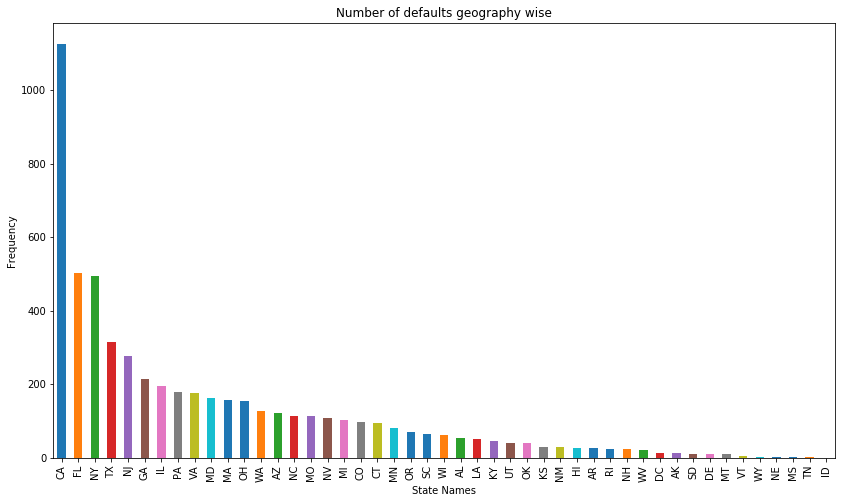

In [64]:
#Univariate-1
#No. of defaults state wise
ax = charged_off['addr_state'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of defaults geography wise")
ax.set_xlabel("State Names")
ax.set_ylabel("Frequency")
    

Text(0,0.5,'Frequency')

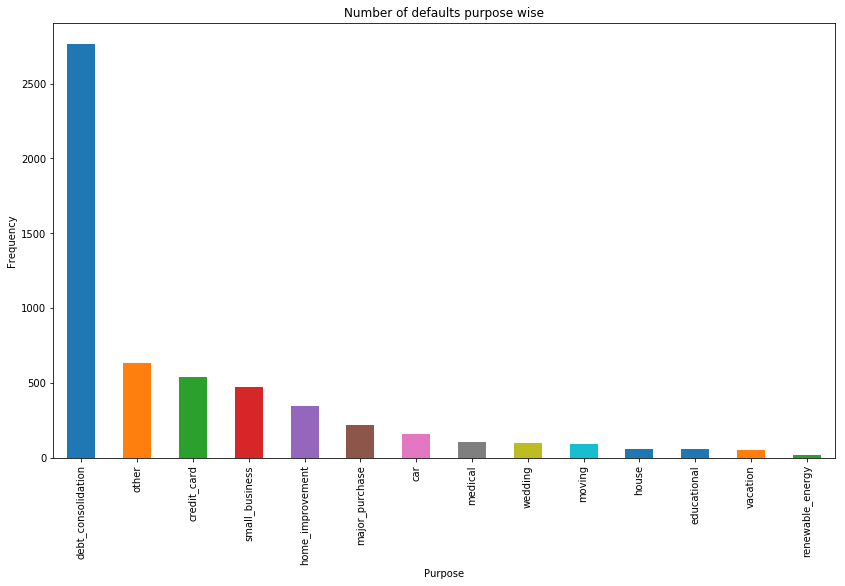

In [65]:
#Univariate-2
#No. of defaults with recurring purpose
ax = charged_off['purpose'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of defaults purpose wise")
ax.set_xlabel("Purpose")
ax.set_ylabel("Frequency")

Text(0,0.5,'Interest rate')

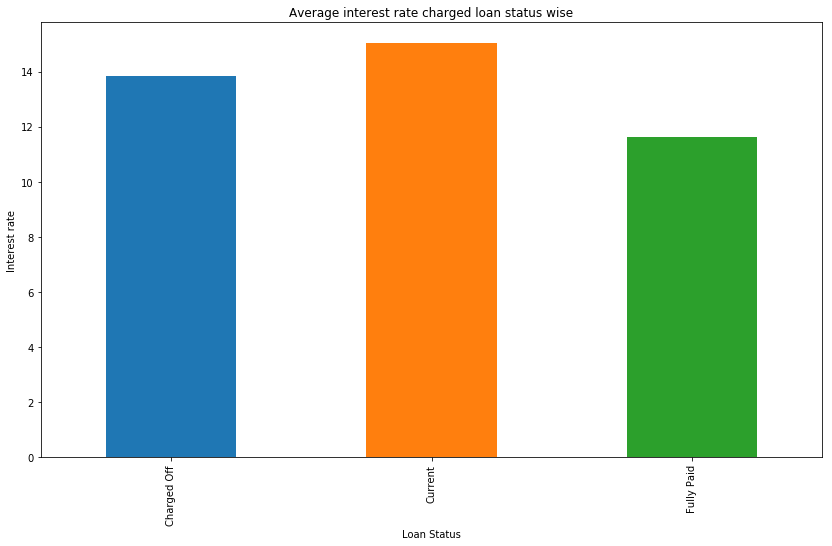

In [69]:
#Univariate-3
#Average interest rate on loans
ax = df_loan.groupby(['loan_status'])['int_rate'].mean().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Average interest rate charged loan status wise")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Interest rate")

#Bivariate Analysis:

In [4]:
## Pivot1 - Term X Loan_Status

df_loan_by_term = df_loan.groupby(['loan_status', 'term'])
# print(df_loan_by_term['term'].count())
df_loan_by_term['term'].describe()

count unique         top   freq
loan_status term                                       
Charged Off  36 months   3227      1   36 months   3227
             60 months   2400      1   60 months   2400
Current      60 months   1140      1   60 months   1140
Fully Paid   36 months  25869      1   36 months  25869
             60 months   7081      1   60 months   7081

Text(0,0.5,'Term')

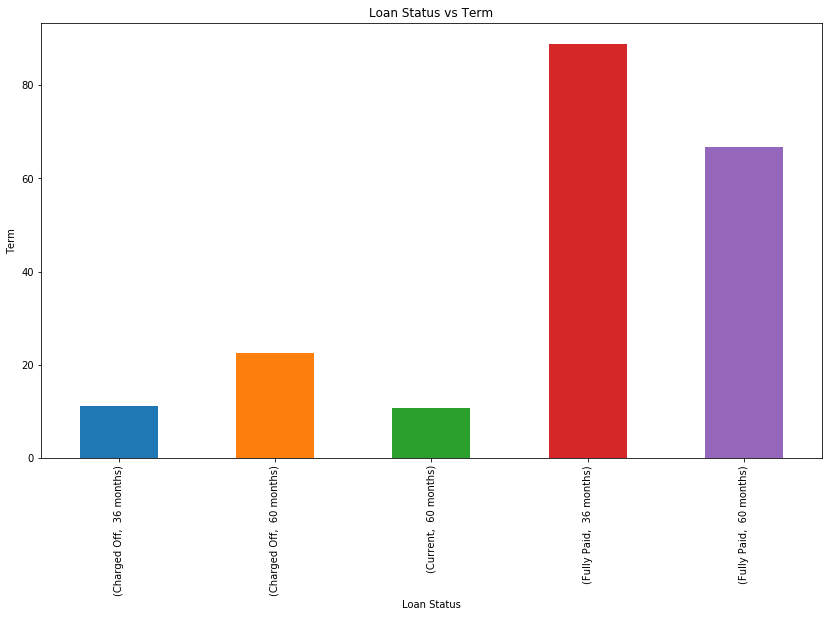

In [8]:
# What Percentage of each Term of loan remains unpaid
ax=(((df_loan_by_term['term'].count())/(df_loan.groupby('term')['term'].count()))*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs Term")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Term")

In [34]:
## Conclusion : The term period the loan clearly impacts defaults. 23% of those who took a loan with a 60 month term 
##              defaulted as against 11% of those with 36 months. 
##              Clearly, one should be giving lesser 60 month loans


In [72]:
 ## Pivot 02 addr_state X loan_status
int_mean = df_loan['int_rate'].median()   # The mean interest rate on loans
print(int_mean)

11.86


In [73]:
## Add columns for int_rates 20% above/below the mean int_rate (high/low). All else is medium
df_loan['high_low']  = df_loan['int_rate'].map(lambda x: 'high' if x > 1.2*int_mean else ('low' if x < 10 else 'medium'))
df_loan['high_low']

0        medium
1          high
2          high
3        medium
4        medium
5           low
6          high
7          high
8          high
9        medium
10         high
11       medium
12       medium
13          low
14       medium
15         high
16         high
17          low
18       medium
19          low
20         high
21       medium
22       medium
23       medium
24       medium
25          low
26         high
27         high
28       medium
29       medium
30          low
31          low
32         high
33          low
34         high
35       medium
36          low
37          low
38       medium
39       medium
40          low
41          low
42         high
43         high
44          low
45          low
46          low
47       medium
48          low
49          low
50          low
51          low
52       medium
53         high
54          low
55         high
56         high
57       medium
58       medium
59         high
60       medium
61         high
62      

In [74]:
df_by_int = df_loan.groupby(['loan_status', 'high_low'])
df_by_int['high_low'].describe()

count unique     top   freq
loan_status high_low                             
Charged Off high       2491      1    high   2491
            low         799      1     low    799
            medium     2337      1  medium   2337
Current     high        622      1    high    622
            low          75      1     low     75
            medium      443      1  medium    443
Fully Paid  high       7753      1    high   7753
            low       11268      1     low  11268
            medium    13929      1  medium  13929

Text(0,0.5,'Interest rate')

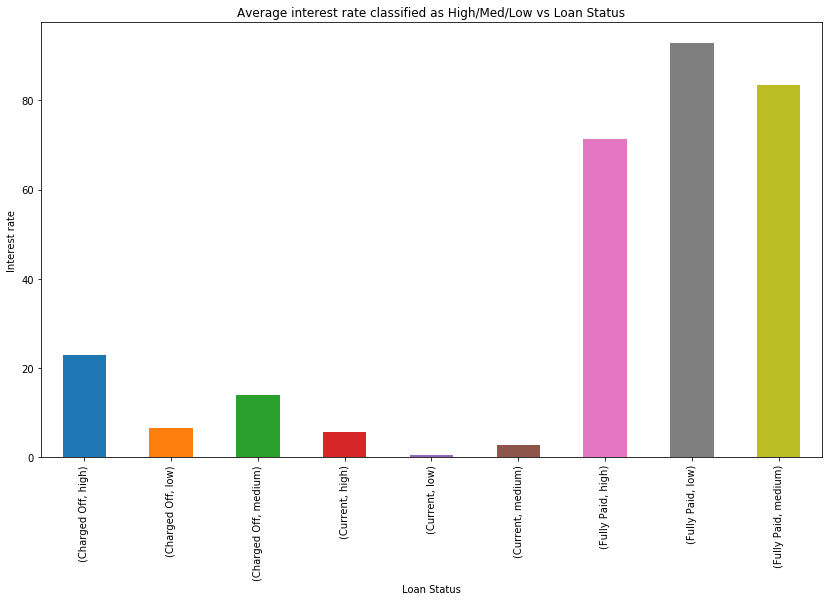

In [75]:
## What percentage, based on high/low/medium intrest rate are charged off ?
ax=(((df_by_int['high_low'].count())/(df_loan.groupby('high_low')['high_low'].count()))*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Average interest rate classified as High/Med/Low vs Loan Status")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Interest rate")

In [67]:
## Conclusion : 
#Clearly, a higher interest rate leads to more defaults. Those with a very high interest rate 
# (in my classification, an interest rate > 14.4% is classified as VH), default at 23.37% as against an average of 14.17%
# Low interest rates leads to lesser defaults. Only 6.6% of loans in this bucket defaulted.
# This is something for the management to think about. Are they risking their loan by charging too high an interest rate?


In [76]:
## Pivot 3: employment length x loan_status
df_by_emp_length = df_loan.groupby(['loan_status', 'emp_length'])
((df_by_emp_length['loan_status'].count())/(df_loan.groupby('emp_length')['loan_status'].count()))*100

loan_status  emp_length
Charged Off  1 year        14.074074
             10+ years     14.990427
             2 years       12.921604
             3 years       13.553114
             4 years       13.445867
             5 years       13.954906
             6 years       13.772992
             7 years       14.833615
             8 years       13.725490
             9 years       12.559618
             < 1 year      13.942832
Current      1 year         2.191358
             10+ years      4.403649
             2 years        2.210574
             3 years        2.026862
             4 years        2.735739
             5 years        2.681292
             6 years        2.736653
             7 years        3.496898
             8 years        2.974983
             9 years        2.543720
             < 1 year       1.636483
Fully Paid   1 year        83.734568
             10+ years     80.605924
             2 years       84.867821
             3 years       84.420024
             4

Text(0,0.5,'Interest rate')

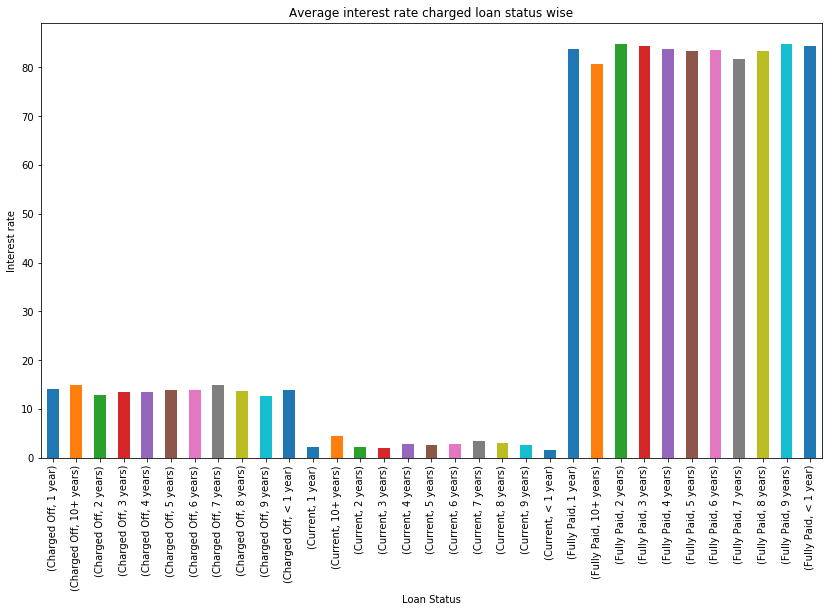

In [77]:
ax=(((df_by_emp_length['loan_status'].count())/(df_loan.groupby('emp_length')['loan_status'].count()))*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Average interest rate charged loan status wise")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Interest rate")

In [103]:
## Conclusion : This variable has no distinct impact on loan defaults

In [78]:
#### Pivot 4 : Home Ownership
df_by_home = df_loan.groupby(['loan_status', 'home_ownership'])
((df_by_home['loan_status'].count())/(df_loan.groupby('home_ownership')['loan_status'].count()))*100

loan_status  home_ownership
Charged Off  MORTGAGE           13.177417
             OTHER              18.367347
             OWN                14.486593
             RENT               15.021959
Current      MORTGAGE            3.612889
             OWN                 2.714192
             RENT                2.217049
Fully Paid   MORTGAGE           83.209695
             NONE              100.000000
             OTHER              81.632653
             OWN                82.799215
             RENT               82.760993
Name: loan_status, dtype: float64

Text(0,0.5,'Home ownership')

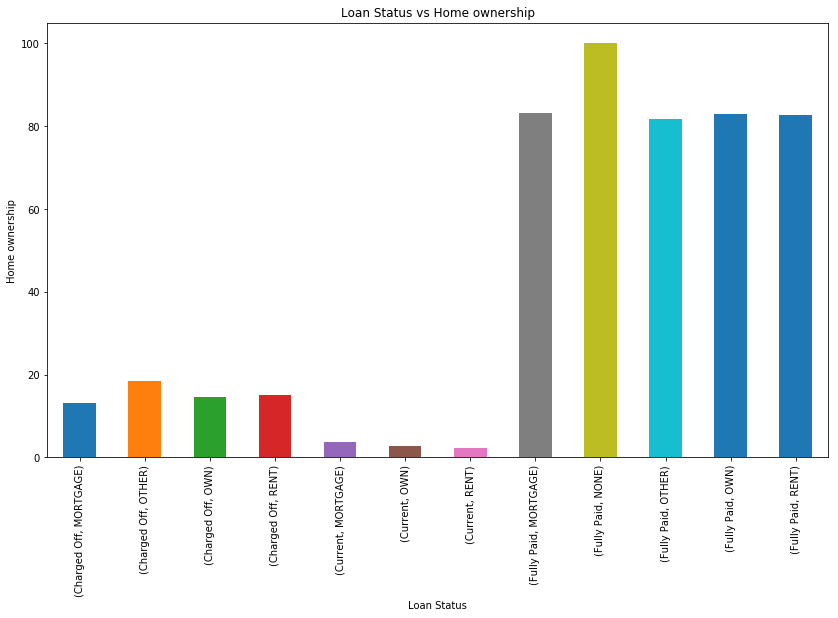

In [79]:
ax=(((df_by_home['loan_status'].count())/(df_loan.groupby('home_ownership')['loan_status'].count()))*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs Home ownership")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Home ownership")

In [112]:
## Conclusion :  Those with mortage homes have a slightly lesser default rate than average - approximately 7%. 
#                Though not very high it is still a significant one given the sample size. 
#                Something the bank could take into account
#                Possibly those with mortages have an inculcated habit of paying loans on time and hence are better customers


In [80]:
#### pivot 5: Income levels
median_income = df_loan['annual_inc'].median()
print("Median income : ", median_income)
df_loan['income_rank'] = df_loan['annual_inc'].map(lambda x: 1 if x > median_income else 0)

# The median income is 59000. I created an income rank: those greater than 59000 have a code of 1, others 0. 

df_by_income = df_loan.groupby(['loan_status', 'income_rank'])
((df_by_income['loan_status'].count())/df_loan.groupby('income_rank')['loan_status'].count())*100


('Median income : ', 59000.0)


loan_status  income_rank
Charged Off  0              16.148819
             1              12.180360
Current      0               2.433384
             1               3.308620
Fully Paid   0              81.417798
             1              84.511020
Name: loan_status, dtype: float64

Text(0,0.5,'Income rank')

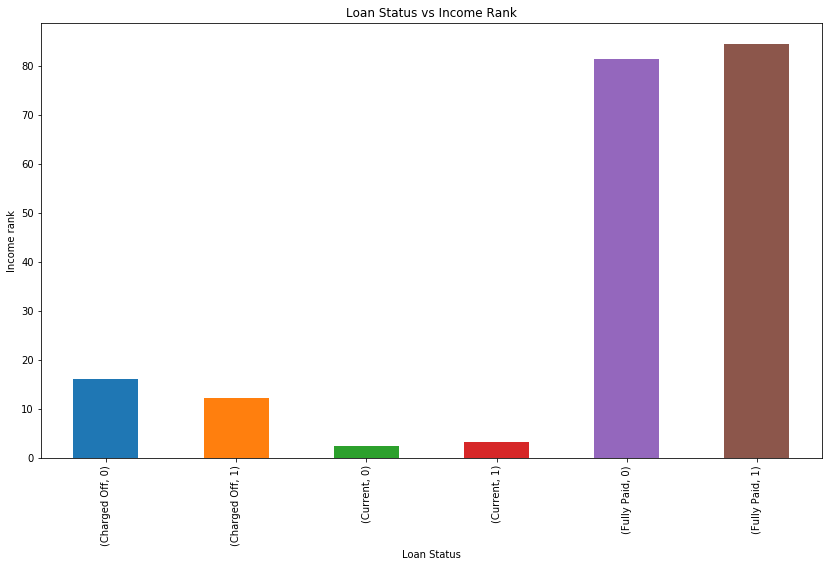

In [81]:
ax=(((df_by_income['loan_status'].count())/df_loan.groupby('income_rank')['loan_status'].count())*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs Income Rank")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Income rank")

In [117]:
# Conclusion : 
# clearly, those with lower income have a higher default rate. They default approximately 14% higher than the average


In [82]:
#### Pivot 6: Verification Status

# Our Hypothesis : Our going in hypothesis was that verified income will have lower defaults.

df_by_verified = df_loan.groupby(['loan_status', 'verification_status'])
(df_by_verified['loan_status'].count()/df_loan.groupby('verification_status')['loan_status'].count())*100

loan_status  verification_status
Charged Off  Not Verified           12.658826
             Source Verified        14.358666
             Verified               16.012179
Current      Not Verified            1.341528
             Source Verified         3.104035
             Verified                4.707627
Fully Paid   Not Verified           85.999645
             Source Verified        82.537298
             Verified               79.280194
Name: loan_status, dtype: float64

Text(0,0.5,'Verification Status')

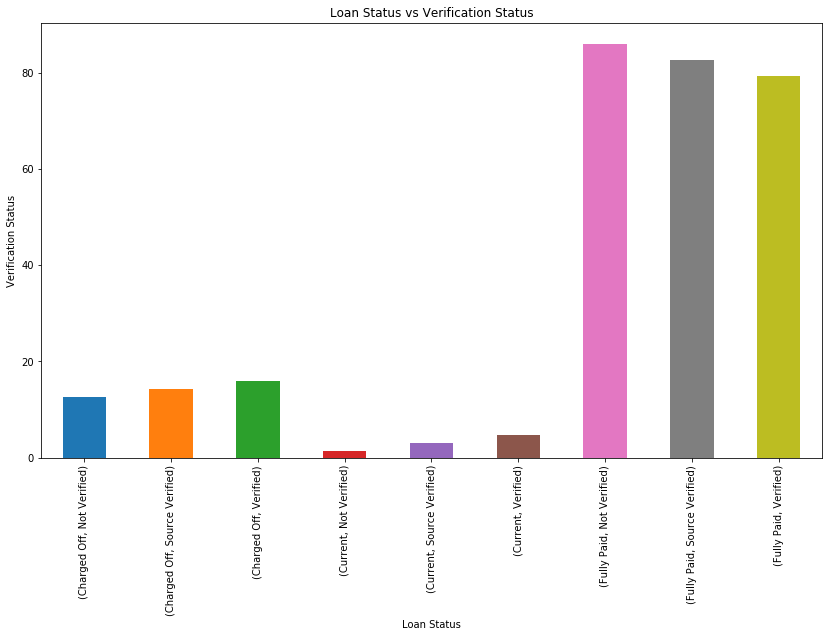

In [41]:
ax=((df_by_verified['loan_status'].count()/df_loan.groupby('verification_status')['loan_status'].count())*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs Verification Status")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Verification Status")

In [125]:
# Conclusion : but the data shows otherwise! Not verified loans have a 11% lower chance of default. 
#              The bank needs to check its sources of income verification and how accurate it is.


In [44]:
#### Pivot 7: Purpose
df_by_purpose = df_loan.groupby(['loan_status', 'purpose'])
(df_by_purpose['loan_status'].count()/df_loan.groupby('purpose')['loan_status'].count())*100

loan_status  purpose           
Charged Off  car                   10.329245
             credit_card           10.565302
             debt_consolidation    14.843624
             educational           17.230769
             home_improvement      11.659946
             house                 15.485564
             major_purchase        10.150892
             medical               15.295815
             moving                15.780446
             other                 15.852742
             renewable_energy      18.446602
             small_business        25.984683
             vacation              13.910761
             wedding               10.137276
Current      car                    3.227889
             credit_card            2.007797
             debt_consolidation     3.143608
             home_improvement       3.393817
             house                  3.674541
             major_purchase         1.691815
             medical                1.731602
             moving    

Text(0,0.5,'Purpose')

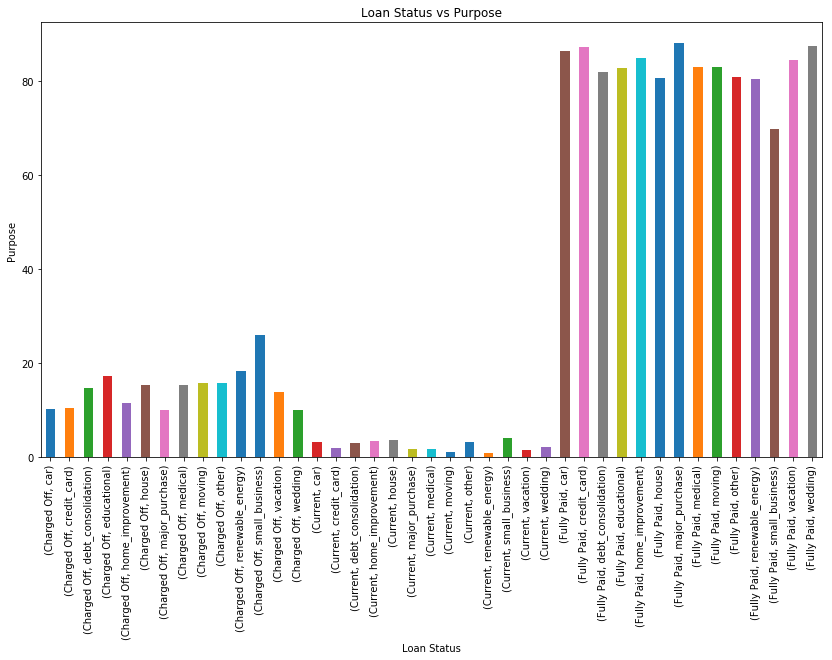

In [45]:
ax=((df_by_purpose['loan_status'].count()/df_loan.groupby('purpose')['loan_status'].count())*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs Purpose")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Purpose")

In [127]:
## Conclusion : The purpose of taking the loan has an impact on defaults. 
#               Small_business, renewable energy, educational are indexing signifcantly higher on defaults


In [46]:
#### Pivot 8: dti

#  My hypothesis is that higher the dti, greater the chance of a default. A higher dti means that a bigger share of the person's 
#  income goes towards debt settlement and hence there is a possibility that one might default.
#  Since this was a continuous variable, I looked at the median value of dti which is 13.4. 
#  Then I created a categorical variable, dti-rank. If the dti value is > median value then 1, else, 0

median_dti = df_loan['dti'].median()
print("Median DTI", median_dti)

df_loan['dti_rank'] = df_loan['dti'].map(lambda x: 1 if x > median_dti else 0)
df_by_dti = df_loan.groupby(['loan_status', 'dti_rank'])
(df_by_dti['loan_status'].count()/df_loan.groupby('dti_rank')['loan_status'].count())*100

('Median DTI', 13.4)


loan_status  dti_rank
Charged Off  0           12.774421
             1           15.561263
Current      0            2.472306
             1            3.268369
Fully Paid   0           84.753273
             1           81.170368
Name: loan_status, dtype: float64

Text(0,0.5,'DTI Rank')

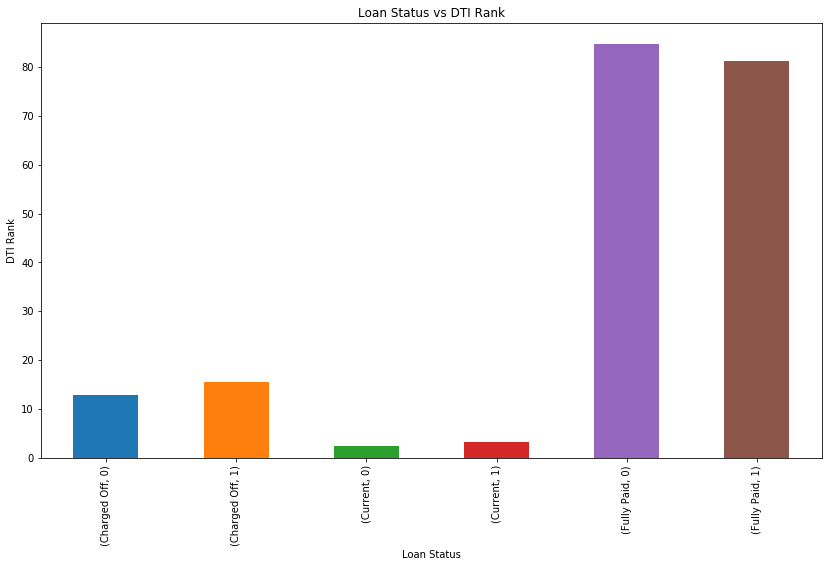

In [47]:
ax=((df_by_dti['loan_status'].count()/df_loan.groupby('dti_rank')['loan_status'].count())*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs DTI Rank")
ax.set_xlabel("Loan Status")
ax.set_ylabel("DTI Rank")

In [134]:
## Conclusion : 
# Clearly, having a higher dti increases default by 10% vs the average of 14.17% 


In [48]:
# Pivot 9: inq_last_6 months
# I wanted to check the impact of crdit enquiries on defaults. 
# The more the credit enquiries the greater the likelihood of a default was my hypothesis

df_by_inq = df_loan.groupby(['loan_status', 'inq_last_6mths'])
(df_by_inq['loan_status'].count()/df_loan.groupby('inq_last_6mths')['loan_status'].count())*100

loan_status  inq_last_6mths
Charged Off  0                 11.813472
             1                 15.285753
             2                 16.225052
             3                 20.308399
             4                 15.644172
             5                 19.178082
             6                 25.000000
             7                 28.571429
             8                 20.000000
Current      0                  3.062176
             1                  2.834746
             2                  2.718513
             3                  2.132546
             4                  3.067485
             5                  1.369863
             6                  1.562500
             7                  2.857143
             8                  6.666667
Fully Paid   0                 85.124352
             1                 81.879501
             2                 81.056435
             3                 77.559055
             4                 81.288344
             5               

Text(0,0.5,'inq_last_6mths')

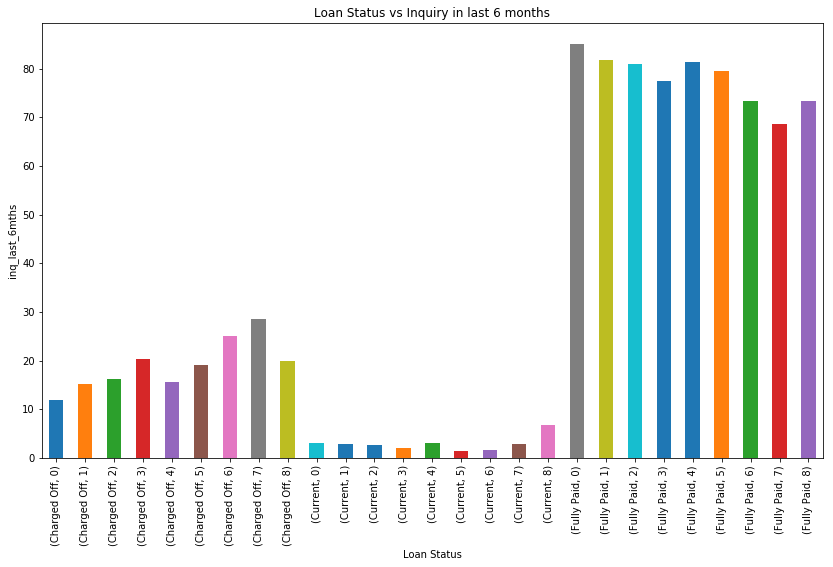

In [49]:
ax=((df_by_inq['loan_status'].count()/df_loan.groupby('inq_last_6mths')['loan_status'].count())*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs Inquiry in last 6 months") 
ax.set_xlabel("Loan Status")
ax.set_ylabel("inq_last_6mths")

In [137]:
## Conclusion : 
#    In general, there seems to be a correlation between number of enquiries and defaults. More than 4 enquiries shows a 
#    significant increase vs. the average defaults of 14.17%
#    This is a red-flag for the bank's management. Whenever the credit enquiries go higher than 4, they need to tighten up 
#    processes as default risk is higher.


In [50]:
# pivot 10: revolving_bal
# Our Hypothesis : My hypothesis was that a higher revolving balance should lead to higher defaults. 
# The median revolving balance was 8850. I used to categorical variable and coded rows > median value as 1 and rest as o

median_revol_bal = df_loan['revol_bal'].median()
print('Median revol_bal : ', median_revol_bal)

df_loan['revol_bal_index'] = df_loan['revol_bal'].map(lambda x: 1 if x > median_revol_bal else 0)
df_by_revolbal = df_loan.groupby(['loan_status', 'revol_bal_index'])
(df_by_revolbal['loan_status'].count()/df_loan.groupby('revol_bal_index')['loan_status'].count())*100

('Median revol_bal : ', 8850.0)


loan_status  revol_bal_index
Charged Off  0                  13.787200
             1                  14.548293
Current      0                   2.069591
             1                   3.671065
Fully Paid   0                  84.143210
             1                  81.780643
Name: loan_status, dtype: float64

Text(0,0.5,'Revolving Balance')

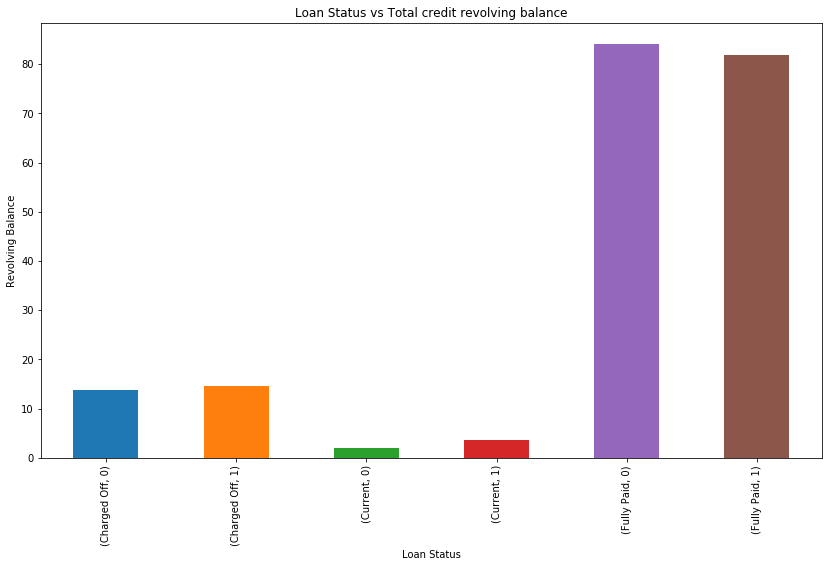

In [51]:
ax=((df_by_revolbal['loan_status'].count()/df_loan.groupby('revol_bal_index')['loan_status'].count())*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs Total credit revolving balance") 
ax.set_xlabel("Loan Status")
ax.set_ylabel("Revolving Balance")

In [141]:
## Conclusion : 
#     There is only a marginal 3% difference vs. the average. This variable does not seem to have a strong influence on defaults


In [53]:
#### pivot 11:  pub_rec
# Our hypothesis was that the number of derogatory public records should have a positive correlation with defaults

df_by_pub_rec = df_loan.groupby(['loan_status', 'pub_rec'])
(df_by_pub_rec['loan_status'].count()/df_loan.groupby('pub_rec')['loan_status'].count())*100

loan_status  pub_rec
Charged Off  0           13.723039
             1           22.227626
             2           19.607843
Current      0            2.909497
             1            2.091440
             2            5.882353
Fully Paid   0           83.367464
             1           75.680934
             2           74.509804
             3          100.000000
             4          100.000000
Name: loan_status, dtype: float64

Text(0,0.5,'Public Records')

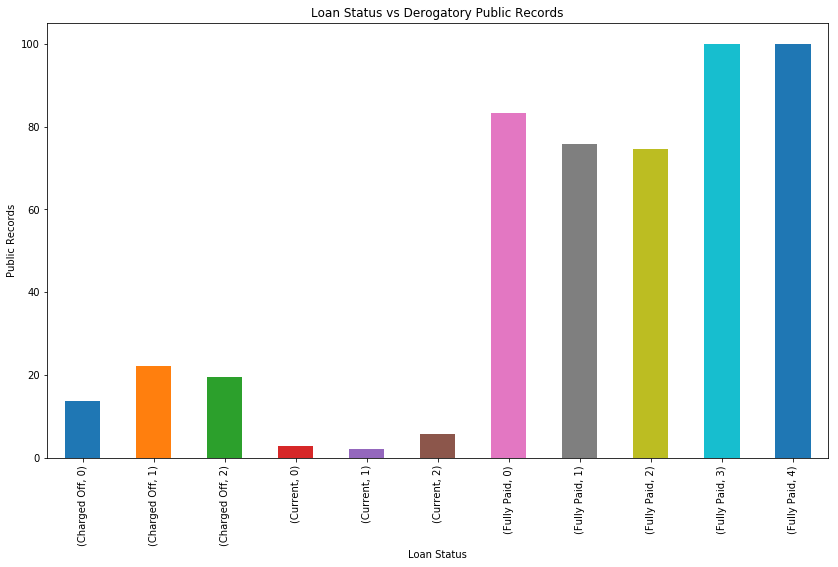

In [54]:
ax=((df_by_pub_rec['loan_status'].count()/df_loan.groupby('pub_rec')['loan_status'].count())*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs Derogatory Public Records") 
ax.set_xlabel("Loan Status")
ax.set_ylabel("Public Records")

In [144]:
## Conclusion : 
# 3 and 4 mentions have very low sample sizes. 
# But the fact is that if there is a derogatory public record, it significantly increases defaults. 
# Both 1 and 2 records index much higher than the mean at 157 and 138% respectively


In [57]:
#### Pivot 12 addr_state X loan_status
df_by_state = df_loan.groupby(['loan_status', 'addr_state'])
print((df_by_state['loan_status'].count()/df_loan.groupby('addr_state')['loan_status'].count())*100)


loan_status  addr_state
Charged Off  AK             18.750000
             AL             11.946903
             AR             11.020408
             AZ             13.993174
             CA             15.847302
             CO             12.373737
             CT             12.516644
             DC              7.009346
             DE             10.526316
             FL             17.585485
             GA             15.379113
             HI             16.091954
             ID             16.666667
             IL             12.918033
             KS             11.439114
             KY             13.846154
             LA             12.155963
             MA             11.865672
             MD             15.443279
             MI             14.305556
             MN             13.170732
             MO             16.618076
             MS             10.526316
             MT             12.941176
             NC             14.467005
             NE           

Text(0,0.5,'States')

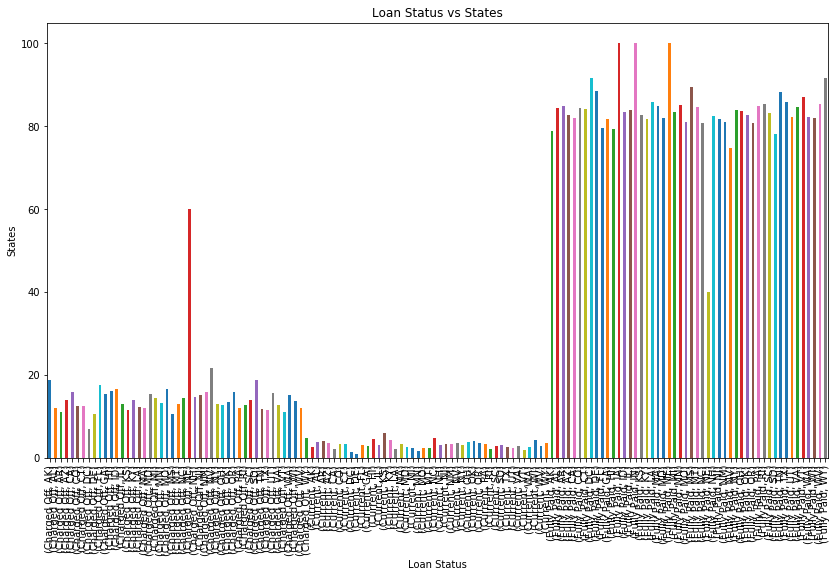

In [58]:
ax=((df_by_state['loan_status'].count()/df_loan.groupby('addr_state')['loan_status'].count())*100).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Loan Status vs States") 
ax.set_xlabel("Loan Status")
ax.set_ylabel("States")

In [150]:
# Conclusion : clearly some states are indexing higher in terms of defaults vs. the average default of 14.17%. 